In [2]:
from face_detector_image_generator import face_detection_and_capture
from nan_finder import find_nan_columns
from keypoints_display_df import show_multiple_images_with_keypoints_in_dataframe
from keypoints_display_tf import show_multiple_images_with_keypoints_in_tf_datasets
from keypoints_flip_tf import flip_coordinate_and_image_horizontal_in_tf_dataset, flip_coordinate_and_image_vertical_in_tf_dataset
from keypoints_flip_df import flip_coordinate_and_image_horizontal_in_df, flip_coordinate_and_image_vertical_in_df
from Canny import Canny

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Deteksi Titik Kunci pada Wajah Menggunakan Jaringan Saraf Tiruan**
---

Setelah kita belajar mendeteksi wajah menggunakan metode Viola-Jones, langkah berikutnya adalah mendeteksi titik-titik kunci pada wajah menggunakan jaringan saraf tiruan (neural network). Titik-titik kunci ini bisa mencakup posisi mata, hidung, mulut, dan sebagainya.

#### Apa Itu Deteksi Titik Kunci Wajah?

**Deteksi titik kunci wajah** adalah proses menemukan titik-titik spesifik pada wajah, seperti ujung mata, sudut bibir, atau ujung hidung. Ini lebih rumit dibandingkan deteksi objek biasa karena kita harus menemukan banyak titik pada berbagai posisi dan orientasi di wajah, bukan hanya empat sudut dari kotak pembatas.

#### Langkah-langkah dalam Deteksi Titik Kunci

1. **Deteksi Wajah**: Pertama-tama, kita harus mendeteksi wajah dalam gambar, biasanya dengan menempatkannya dalam sebuah kotak pembatas (bounding box).
  
2. **Deteksi Titik Kunci**: Setelah wajah ditemukan, kita menggunakan jaringan saraf tiruan untuk mendeteksi titik-titik kunci pada wajah tersebut. Ini berarti kita harus menemukan lebih dari 10 titik berbeda yang merepresentasikan bagian-bagian penting dari wajah.

#### Menggunakan Data untuk Pelatihan

Untuk melatih jaringan saraf tiruan agar bisa mendeteksi titik kunci dengan baik, kita memerlukan banyak data. Salah satu sumber data yang bagus adalah dari Kaggle, di mana terdapat banyak gambar wajah beserta titik-titik kuncinya. Misalnya, tantangan deteksi titik kunci wajah di Kaggle menyediakan file CSV yang berisi link ke 7.049 gambar (berukuran 96 x 96 piksel), masing-masing dengan 15 titik kunci.

#### Proses Pelatihan

Untuk melatih model deteksi titik kunci:
1. **Kumpulkan Data**: Kumpulkan gambar wajah dan tandai titik-titik kuncinya.
2. **Persiapkan Data**: Format data tersebut agar bisa digunakan oleh jaringan saraf tiruan.
3. **Latih Model**: Gunakan data tersebut untuk melatih model jaringan saraf tiruan agar dapat mendeteksi titik-titik kunci pada wajah baru.

#### Mengapa Ini Penting?

Deteksi titik kunci pada wajah sangat berguna dalam berbagai aplikasi, seperti:
- **Pengenalan Wajah**: Membantu komputer mengenali siapa orang dalam gambar.
- **Animasi Wajah**: Digunakan dalam pembuatan karakter animasi yang realistis.
- **Analisis Ekspresi Wajah**: Membantu memahami emosi seseorang dari ekspresi wajahnya.

#### Kesimpulan

Deteksi titik kunci pada wajah adalah langkah lanjutan setelah deteksi wajah yang memungkinkan kita untuk menganalisis wajah dengan lebih detail. Dengan menggunakan jaringan saraf tiruan, kita bisa mendeteksi titik-titik kunci ini secara akurat, meskipun ini adalah tugas yang lebih rumit dibandingkan deteksi objek biasa.

Semoga penjelasan ini membantu! Jika ada yang masih membingungkan atau ada yang ingin ditanyakan lebih lanjut, jangan ragu untuk bertanya.

### **Mempersiapkan Dataset untuk Deteksi Titik Kunci Wajah**
---

Untuk melatih komputer agar bisa mendeteksi titik kunci pada wajah, kita perlu mengumpulkan dan mempersiapkan dataset yang berisi banyak gambar wajah. Berikut adalah langkah-langkah untuk membuat dataset ini menggunakan webcam di komputer kamu.

### Langkah-langkah Membuat Dataset

1. **Memuat Haar Cascade Classifier**
   - Pertama, kita perlu memuat classifier Haar cascade yang akan kita gunakan untuk mendeteksi wajah. Classifier ini adalah file XML yang bisa kamu temukan di folder OpenCV kamu.
   - Contoh kode:
     ```python
     face_cascade = cv2.CascadeClassifier('path_to_haarcascade_frontalface_default.xml')
     ```

2. **Mengatur Kamera**
   - Kita menggunakan webcam untuk mengambil gambar wajah. Perintah `cv2.VideoCapture(0)` digunakan untuk mengakses kamera internal komputer. Jika kamu menggunakan kamera eksternal, gunakan `cv2.VideoCapture(1)`.
   - Contoh kode:
     ```python
     cam = cv2.VideoCapture(0)
     ```

3. **Mendeteksi Wajah dan Menampilkan di Layar**
   - Setiap frame yang dibaca dari kamera diproses untuk mendeteksi wajah menggunakan classifier yang kita muat di langkah 1. Jika wajah terdeteksi, kotak pembatas akan digambar di sekitar wajah dan hanya bagian wajah yang akan ditampilkan di layar.
   - Contoh kode:
     ```python
     while(True):
         ret, frame = cam.read()
         faces = face_cascade.detectMultiScale(frame, 1.3, 5)
         for (x, y, w, h) in faces:
             if w > 130:
                 detected_face = frame[int(y):int(y+h), int(x):int(x+w)]
                 cv2.imshow("test", detected_face)
         if not ret:
             break
         k = cv2.waitKey(1)
     ```

4. **Menyimpan Gambar**
   - Gambar wajah yang terdeteksi kemudian diubah ukurannya menjadi 299x299 piksel dan disimpan dalam folder yang sudah kamu buat (misalnya, folder `dataset`). Setiap kali kamu menekan tombol spasi, gambar akan disimpan dengan nomor file yang terus bertambah.
   - Contoh kode:
     ```python
     faceresize = cv2.resize(detected_face, (299, 299))
     img_name = "dataset/opencv_frame_{}.jpg".format(img_counter)
     cv2.imwrite(img_name, faceresize)
     ```

5. **Mengumpulkan dan Mengannotasi Gambar**
   - Ambil sekitar 100 gambar wajah dengan berbagai posisi dan orientasi. Lebih banyak gambar akan memberikan hasil deteksi yang lebih baik. Untuk anotasi (penandaan) titik kunci pada wajah, kamu bisa menggunakan alat anotasi seperti VGG annotator.
   - VGG annotator memungkinkan kamu untuk menandai titik-titik kunci seperti mata, hidung, dan bibir pada gambar. Misalnya, kamu bisa menandai 16 titik pada wajah yang mencakup mata kiri, mata kanan, hidung, bibir, dan bentuk wajah luar.

### Kesimpulan

Dengan mengikuti langkah-langkah ini, kamu bisa membuat dataset sendiri yang berisi gambar-gambar wajah dengan titik-titik kunci yang telah dianotasi. Dataset ini sangat penting untuk melatih model jaringan saraf tiruan agar bisa mendeteksi titik-titik kunci pada wajah dengan akurat. Proses ini memerlukan kerja keras dan ketelitian, tetapi hasilnya akan sangat bermanfaat untuk berbagai aplikasi seperti pengenalan wajah dan analisis ekspresi wajah.

In [6]:
# face_cascade_path = './Assets/data/haarcascades/haarcascade_frontalface_default.xml'
# face_detection_and_capture(face_cascade_path=face_cascade_path, output_dir='./Assets/Images/', img_size=(299, 299), alpha=0.1, offset=50)

### **Memproses Data Titik Kunci**
---

Ketika kita ingin mendeteksi titik-titik penting di wajah (seperti mata, hidung, dan mulut), kita membutuhkan data yang sudah di-annotate. Ada alat yang disebut VGG annotator yang bisa membantu kita dengan ini. Alat ini akan menghasilkan file CSV yang berisi koordinat (x, y) untuk setiap titik kunci pada setiap gambar.

#### Mengapa Ini Penting?

1. **Efisiensi**: Python kita tidak akan mencari banyak file gambar secara langsung, tetapi akan mencari data dari file CSV.
2. **Pengolahan Data**: Untuk setiap file CSV, ada 16 titik kunci yang harus diproses.
3. **Alternatif**: Ini adalah alternatif untuk menggunakan metode `ImageDataGenerator` dari Keras yang biasa digunakan untuk mengelola banyak file dalam direktori.

#### Langkah-Langkahnya

Untuk memudahkan pemahaman, kita akan membagi proses ini menjadi dua bagian:

1. **Praproses sebelum input ke dalam kode Keras-Python**
2. **Praproses dalam kode Keras-Python**

#### Praproses Sebelum Input ke Keras-Python

Sebelum kita memasukkan data ke dalam model Keras, kita perlu membersihkan dan menyiapkan data dari file CSV yang dihasilkan oleh VGG annotator. Proses ini melibatkan membaca file CSV, mengekstrak koordinat titik kunci, dan memastikan bahwa data siap untuk digunakan oleh model.

#### Praproses Dalam Kode Keras-Python

Setelah data siap, kita akan menggunakan Keras (sebuah pustaka untuk membuat dan melatih model pembelajaran mendalam) untuk memproses data lebih lanjut. Di sini, kita akan memastikan bahwa data diolah dengan benar saat dilatih oleh model.

#### Kesimpulan

Memproses data titik kunci memerlukan dua langkah utama: praproses sebelum memasukkan data ke dalam model Keras, dan praproses dalam model Keras itu sendiri. Dengan cara ini, kita memastikan bahwa data yang kita gunakan bersih, terstruktur, dan siap digunakan untuk melatih model pembelajaran mendalam yang akurat dan efisien.

In [3]:
train_path = './Assets/datasets/training.csv'
test_path = './Assets/datasets/test.csv'

# train_path = './Assets/trainimgface.csv'
# test_path = './Assets/testimgface.csv'
train_data = pd.read_csv(train_path)  
test_data = pd.read_csv(test_path)

In [4]:
train_data[:1]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [5]:
test_data[:1]

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...


In [6]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [7]:
test_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1)
memory usage: 57.2 MB


In [8]:
get_nan_in_train_data = find_nan_columns(train_data, name_columns='facial_key_points', max_display=2)

left_eye_center_x:	Jumlah NaN: 10
left_eye_center_y:	Jumlah NaN: 10
right_eye_center_x:	Jumlah NaN: 13
right_eye_center_y:	Jumlah NaN: 13
left_eye_inner_corner_x:	Jumlah NaN: 4778
left_eye_inner_corner_y:	Jumlah NaN: 4778
left_eye_outer_corner_x:	Jumlah NaN: 4782
left_eye_outer_corner_y:	Jumlah NaN: 4782
right_eye_inner_corner_x:	Jumlah NaN: 4781
right_eye_inner_corner_y:	Jumlah NaN: 4781
right_eye_outer_corner_x:	Jumlah NaN: 4781
right_eye_outer_corner_y:	Jumlah NaN: 4781
left_eyebrow_inner_end_x:	Jumlah NaN: 4779
left_eyebrow_inner_end_y:	Jumlah NaN: 4779
left_eyebrow_outer_end_x:	Jumlah NaN: 4824
left_eyebrow_outer_end_y:	Jumlah NaN: 4824
right_eyebrow_inner_end_x:	Jumlah NaN: 4779
right_eyebrow_inner_end_y:	Jumlah NaN: 4779
right_eyebrow_outer_end_x:	Jumlah NaN: 4813
right_eyebrow_outer_end_y:	Jumlah NaN: 4813
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	Jumlah NaN: 4780
mouth_left_corner_y:	Jumlah NaN: 4780
mouth_right_corner_x:	Jumlah NaN: 4779
mouth_right_corner_y:	Jumlah NaN:

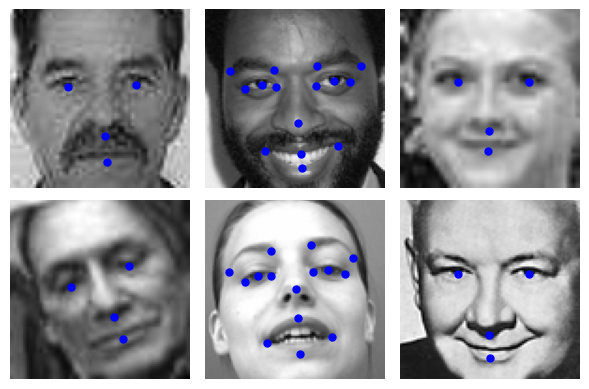

In [9]:
keypoints_columns = train_data.columns[:-1]
show_multiple_images_with_keypoints_in_dataframe(
    train_data, 
    image_column='Image',
    # parent_path='./Assets/Images/',
    keypoints_columns=keypoints_columns, 
    num_images=6, 
    image_size=(96, 96),
    figsize_per_image=(2, 2),
    scatter_size=100,
    n_seed=None
)

In [10]:
train_data_copy = train_data.copy(deep=True)

In [11]:
train_data_copy.dropna(inplace=True)

In [12]:
get_nan_in_train_data_copy = find_nan_columns(train_data_copy, name_columns='facial_key_points', max_display=11)

left_eye_center_x:	
left_eye_center_y:	
right_eye_center_x:	
right_eye_center_y:	
left_eye_inner_corner_x:	
left_eye_inner_corner_y:	
left_eye_outer_corner_x:	
left_eye_outer_corner_y:	
right_eye_inner_corner_x:	
right_eye_inner_corner_y:	
right_eye_outer_corner_x:	
right_eye_outer_corner_y:	
left_eyebrow_inner_end_x:	
left_eyebrow_inner_end_y:	
left_eyebrow_outer_end_x:	
left_eyebrow_outer_end_y:	
right_eyebrow_inner_end_x:	
right_eyebrow_inner_end_y:	
right_eyebrow_outer_end_x:	
right_eyebrow_outer_end_y:	
nose_tip_x:	
nose_tip_y:	
mouth_left_corner_x:	
mouth_left_corner_y:	
mouth_right_corner_x:	
mouth_right_corner_y:	
mouth_center_top_lip_x:	
mouth_center_top_lip_y:	
mouth_center_bottom_lip_x:	
mouth_center_bottom_lip_y:	
Image:	


In [13]:
print(f'''
data: {train_data_copy['Image'][0][:10]}
len: {len(train_data_copy['Image'][0][:10])}
type: {type(train_data_copy['Image'][0][:10])}
''')



data: 238 236 23
len: 10
type: <class 'str'>



In [14]:
length_data = len(train_data_copy['Image'][[0]].str.split(' ')[0])
target_reshape = int(np.sqrt(length_data))

print(f'''
length data: {length_data}
target_reshape: {target_reshape}
''')



length data: 9216
target_reshape: 96



In [82]:
train_data_images=train_data_copy['Image'].values
train_data_facial_keypoints=train_data_copy.drop(columns=['Image']).values

In [83]:
facial_keypoints_train_datasets = tf.data.Dataset.from_tensor_slices((train_data_images, train_data_facial_keypoints))

print(f'info data: {facial_keypoints_train_datasets}')
print(f'number of data: {len(facial_keypoints_train_datasets)}')

info data: <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>
number of data: 2140


In [128]:
# def compute_canny(image, keypoints, canny):
#     # Convert the image to float32
#     image = tf.cast(image, tf.float32)
#     # Expand dimensions to add the batch size
#     image = tf.expand_dims(image, axis=0)
#     canny_edges = canny(image)

#     canny_edges = tf.squeeze(canny_edges, axis=0)
#     return canny_edges, keypoints

# canny = Canny(sigma=0.8, threshold_min=50, threshold_max=80, tracking_con=5, tracking_iterations=5)
# canny_facial_keypoints_train_dataset = facial_keypoints_concatenated_train_dataset.map(lambda image, keypoint: compute_canny(image, keypoint, canny))

# def compute_sobel(image, keypoints):
#     # Convert the image to float32
#     image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    
#     # Expand dimensions to add the batch size
#     image = tf.expand_dims(image, axis=0)
    
#     # Menghitung gradien Sobel dalam arah x dan y
#     sobel_edges = tf.image.sobel_edges(image)
    
#     # Remove the batch dimension for further processing
#     sobel_edges = tf.squeeze(sobel_edges, axis=0)
    
#     # Reshape the sobel_edges tensor
#     sobelX = sobel_edges[:, :, :, 0]
#     sobelY = sobel_edges[:, :, :, 1]
    
#     # Menghitung magnitudo Sobel
#     sobelG = tf.sqrt(tf.square(sobelX) + tf.square(sobelY))
    
#     return sobelG, keypoints

==========================Check data=========================
    img value: b'238 236 237 238 240 '
    dtype img: <class 'bytes'>
    keypoint value: [66.03356391 39.00227368 30.22700752 36.4216782  59.58207519 39.64742256
 73.13034586 39.96999699 36.35657143 37.3894015  23.45287218 37.3894015
 56.95326316 29.03364812 80.22712782 32.22813835 40.22760902 29.0023218
 16.35637895 29.64747068 44.42057143 57.06680301 61.19530827 79.97016541
 28.61449624 77.38899248 43.3126015  72.93545865 43.13070677 84.48577444]
    dtype keypoint: float64
=======================Convert to List=======================
    vector of img: [b'238' b'236' b'237' ... b'70' b'75' b'90'] 
    shape img: (9216,)
    dtype img: <dtype: 'string'>
======================Convert to Numeric=====================
    vector of img: [238. 236. 237. ...  70.  75.  90.] 
    shape img: (9216,)
    dtype img: <dtype: 'float32'>
    target image ndim: 96.0
    max intensity: 253.0
    min intensity: 2.0
============Reshape to

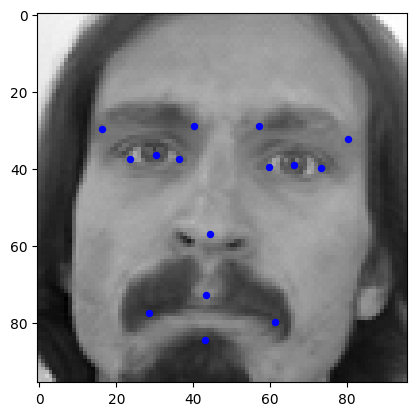

In [84]:
for img, keypoint in facial_keypoints_train_datasets.take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    img value: {img[:20]}
    dtype img: {type(img)}
    keypoint value: {keypoint}
    dtype keypoint: {keypoint.dtype}'''
    )

    print(f"{'Convert to List'.center(61, '=')}")
    cvt_to_list = tf.strings.split(img, sep=' ')
    print(f'''    vector of img: {cvt_to_list} 
    shape img: {cvt_to_list.shape}
    dtype img: {cvt_to_list.dtype}'''
    )
    
    print(f"{'Convert to Numeric'.center(61, '=')}")
    cvt_to_num = image = tf.strings.to_number(cvt_to_list, out_type=tf.float32)
    print(f'''    vector of img: {cvt_to_num} 
    shape img: {cvt_to_num.shape}
    dtype img: {cvt_to_num.dtype}
    target image ndim: {tf.math.sqrt(cvt_to_num.shape[0] / 1.)}
    max intensity: {tf.reduce_max(cvt_to_num)}
    min intensity: {tf.reduce_min(cvt_to_num)}'''
    )

    print(f"{'Reshape to height and width dimension'.center(61, '=')}")
    cvt_to_img = tf.reshape(cvt_to_num, (96, 96))
    print(f'''    matriks of img: {cvt_to_img} 
    shape img: {cvt_to_img.shape}
    dtype img: {cvt_to_img.dtype}
    max intensity: {tf.reduce_max(cvt_to_num)}
    min intensity: {tf.reduce_min(cvt_to_num)}'''
    )

    for i in range(0, len(keypoint), 2):
        x = keypoint[i]
        y = keypoint[i+1]
        plt.scatter(x, y, s=75, marker='.', c='blue')
    plt.imshow(cvt_to_img, cmap='gray')
plt.show()

In [85]:
def preprocessing_data(image, keypoint=None, input_shape=None):
    # Split the image string into a list of numbers
    image = tf.strings.split(image, sep=' ')
    # Convert the split strings into numbers
    image = tf.strings.to_number(image, out_type=tf.float32)
    image = (image / 255) * 1.0
    # Reshape the image to its original shape (e.g., 96x96 if the image is 96x96 pixels)
    image = tf.reshape(image, input_shape)
    if keypoint is not None:
        # keypoint = tf.cast(keypoint, tf.float32)
        return image, keypoint
    else:
        return image

In [86]:
facial_keypoints_train_datasets_processed = facial_keypoints_train_datasets.map(
    map_func=lambda image, keypoint: 
        preprocessing_data(
            image=image, 
            keypoint=keypoint,
            input_shape=(96, 96, 1)
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

facial_keypoints_train_datasets_flip_h = facial_keypoints_train_datasets_processed.map(
    map_func=lambda image, keypoint: 
        flip_coordinate_and_image_horizontal_in_tf_dataset(
            image=image,
            keypoint=keypoint
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

facial_keypoints_concatenated_train_dataset = facial_keypoints_train_datasets_processed.concatenate(facial_keypoints_train_datasets_flip_h)
facial_keypoints_concatenated_train_dataset_cached = facial_keypoints_concatenated_train_dataset.cache()

In [87]:
print(f'info data: {facial_keypoints_concatenated_train_dataset_cached}')
print(f'number of data: {len(facial_keypoints_concatenated_train_dataset_cached)}')

info data: <CacheDataset element_spec=(TensorSpec(shape=(96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>
number of data: 4280


==========================Check data=========================
    shape img: (96, 96, 1)
    dtype img: float32
    max intensity: 0.7372549176216125
    min intensity: 0.0
    keypoint value: [65.9606069  40.89997241 29.05555862 38.51917241 59.41274483 41.79244138
 72.21053793 42.09037241 34.71028966 39.41164138 23.10355862 39.41164138
 59.11547586 32.26857931 80.544      34.65004138 38.28215172 31.07817931
 15.96049655 30.18571034 46.91288276 62.92369655 56.73401379 86.43575172
 35.90068966 85.84055172 46.61495172 80.78102069 45.72248276 95.36441379]
    dtype keypoint: float64


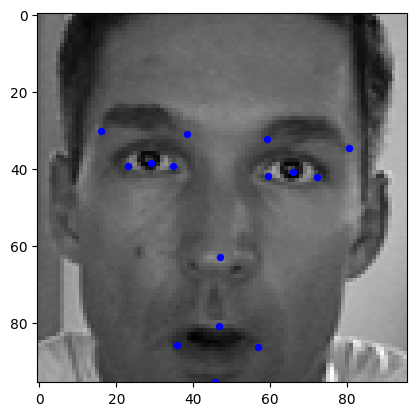

In [104]:
for img, keypoint in facial_keypoints_concatenated_train_dataset_cached.skip(60).take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    shape img: {img.shape}
    dtype img: {img.dtype}
    max intensity: {tf.reduce_max(img)}
    min intensity: {tf.reduce_min(img)}
    keypoint value: {keypoint}
    dtype keypoint: {keypoint.dtype}'''
    )

    for i in range(0, len(keypoint), 2):
        x = keypoint[i]
        y = keypoint[i+1]
        plt.scatter(x, y, s=75, marker='.', c='blue')
    plt.imshow(img, cmap='gray')
plt.show()

Original Datasets


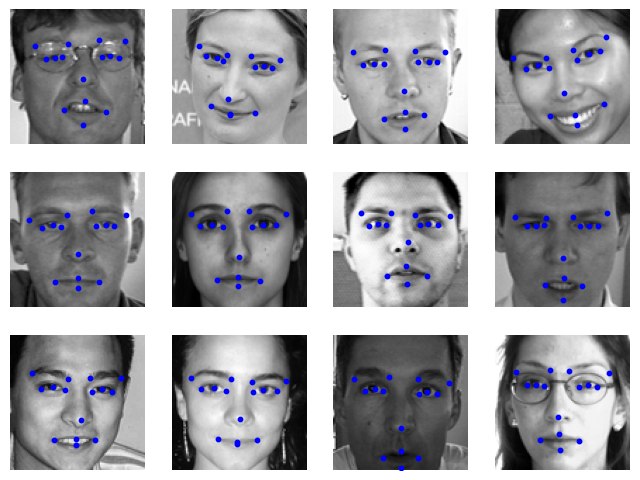

In [106]:
print('Original Datasets')
tf.random.set_seed(0)
show_multiple_images_with_keypoints_in_tf_datasets(
    dataset=facial_keypoints_concatenated_train_dataset_cached.take(int(len(facial_keypoints_concatenated_train_dataset_cached)/2)), 
    num_images=12, 
    figsize_per_image=(2, 2), 
    scatter_size=10, 
    scatter_color='blue'
)

Fliped Datasets


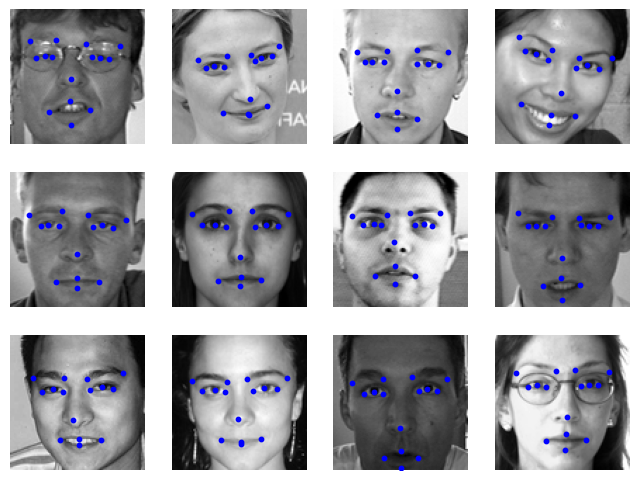

In [107]:
print('Fliped Datasets')
tf.random.set_seed(0)
show_multiple_images_with_keypoints_in_tf_datasets(
    dataset=facial_keypoints_concatenated_train_dataset_cached.skip(int(len(facial_keypoints_concatenated_train_dataset_cached)/2)), 
    num_images=12, 
    figsize_per_image=(2, 2), 
    scatter_size=10, 
    scatter_color='blue'
)

In [46]:
facial_keypoints_concatenated_train_dataset_shuffled = facial_keypoints_concatenated_train_dataset_cached.shuffle(len(facial_keypoints_concatenated_train_dataset_cached))
facial_keypoints_concatenated_train_dataset_batched = facial_keypoints_concatenated_train_dataset_shuffled.batch(64)
facial_keypoints_concatenated_train_dataset_prefetched = facial_keypoints_concatenated_train_dataset_batched.prefetch(tf.data.AUTOTUNE)

print(f'info data: {facial_keypoints_concatenated_train_dataset_prefetched}')
print(f'number of data: {len(facial_keypoints_concatenated_train_dataset_prefetched)}')

info data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 30), dtype=tf.float64, name=None))>
number of data: 67


In [72]:
test_data_copy = test_data.copy(deep=True)

In [73]:
facial_keypoints_test_datasets = tf.data.Dataset.from_tensor_slices(test_data_copy['Image'].values)

print(f'info data: {facial_keypoints_test_datasets}')
print(f'number of data: {len(facial_keypoints_test_datasets)}')

info data: <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
number of data: 1783


==========================Check data=========================
    img value: b'182 183 182 182 180 '
    dtype img: <class 'bytes'>
=======================Convert to List=======================
    vector of img: [b'182' b'183' b'182' ... b'8' b'5' b'5'] 
    shape img: (9216,)
    dtype img: <dtype: 'string'>
======================Convert to Numeric=====================
    vector of img: [182. 183. 182. ...   8.   5.   5.] 
    shape img: (9216,)
    dtype img: <dtype: 'float32'>
    target image ndim: 96.0
    max intensity: 191.0
    min intensity: 0.0
============Reshape to height and width dimension============
    matriks of img: [[182. 183. 182. ... 182. 182. 182.]
 [182. 181. 181. ... 182. 182. 182.]
 [182. 181. 180. ... 182. 181. 182.]
 ...
 [ 42.  36.  20. ... 126. 136. 153.]
 [ 31.   8.   0. ...   9.  11.  33.]
 [  3.   0.   1. ...   8.   5.   5.]] 
    shape img: (96, 96)
    dtype img: <dtype: 'float32'>
    max intensity: 191.0
    min intensity: 0.0


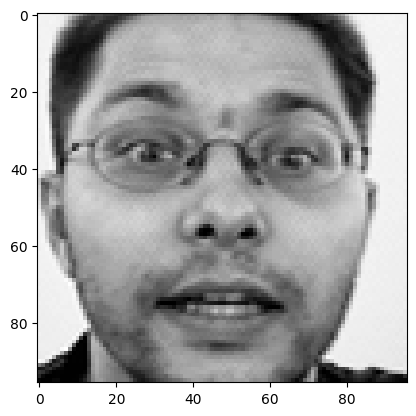

In [80]:
for img in facial_keypoints_test_datasets.take(1).as_numpy_iterator():
    print(f"{'Check data'.center(61, '=')}")
    print(f'''    img value: {img[:20]}
    dtype img: {type(img)}'''
    )

    print(f"{'Convert to List'.center(61, '=')}")
    cvt_to_list = tf.strings.split(img, sep=' ')
    print(f'''    vector of img: {cvt_to_list} 
    shape img: {cvt_to_list.shape}
    dtype img: {cvt_to_list.dtype}'''
    )
    
    print(f"{'Convert to Numeric'.center(61, '=')}")
    cvt_to_num = image = tf.strings.to_number(cvt_to_list, out_type=tf.float32)
    print(f'''    vector of img: {cvt_to_num} 
    shape img: {cvt_to_num.shape}
    dtype img: {cvt_to_num.dtype}
    target image ndim: {tf.math.sqrt(cvt_to_num.shape[0] / 1.)}
    max intensity: {tf.reduce_max(cvt_to_num)}
    min intensity: {tf.reduce_min(cvt_to_num)}'''
    )

    print(f"{'Reshape to height and width dimension'.center(61, '=')}")
    cvt_to_img = tf.reshape(cvt_to_num, (96, 96))
    print(f'''    matriks of img: {cvt_to_img} 
    shape img: {cvt_to_img.shape}
    dtype img: {cvt_to_img.dtype}
    max intensity: {tf.reduce_max(cvt_to_num)}
    min intensity: {tf.reduce_min(cvt_to_num)}'''
    )

    plt.imshow(cvt_to_img, cmap='gray')
plt.show()

In [74]:
facial_keypoints_test_datasets_processed = facial_keypoints_test_datasets.map(
    map_func=lambda image: 
        preprocessing_data(
            image=image, 
            input_shape=(96, 96, 1)
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

facial_keypoints_concatenated_test_dataset_batched = facial_keypoints_test_datasets_processed.batch(64)
facial_keypoints_concatenated_test_dataset_cached = facial_keypoints_concatenated_test_dataset_batched.cache()
facial_keypoints_concatenated_test_dataset_prefetched = facial_keypoints_concatenated_test_dataset_cached.prefetch(tf.data.AUTOTUNE)

In [75]:
print(f'info data: {facial_keypoints_concatenated_test_dataset_prefetched}')
print(f'number of data: {len(facial_keypoints_concatenated_test_dataset_prefetched)}')

info data: <_PrefetchDataset element_spec=TensorSpec(shape=(None, 96, 96, 1), dtype=tf.float32, name=None)>
number of data: 28


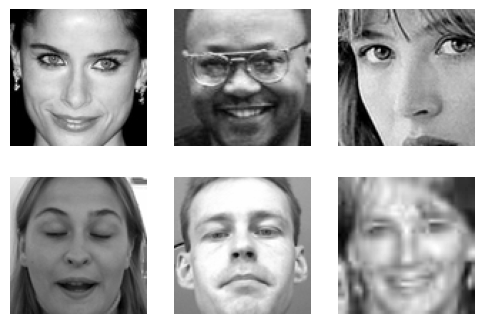

In [78]:
show_multiple_images_with_keypoints_in_tf_datasets(facial_keypoints_test_datasets_processed.map(lambda x: (x, None)), num_images=6)

In [110]:
facial_keypoints_concatenated_train_dataset.save("./Assets/datasets/facial_keypoints_dataset_dropna.tfrecord", compression="GZIP")

In [111]:
facial_keypoints_test_datasets_processed.save("./Assets/datasets/facial_keypoints_test_dataset.tfrecord", compression="GZIP")

In [112]:
canny_facial_keypoints_train_dataset_loaded = tf.data.Dataset.load("./Assets/datasets/facial_keypoints_dataset_dropna.tfrecord", compression="GZIP")

In [113]:
canny_facial_keypoints_train_dataset_loaded.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=4280>

In [114]:
canny_facial_keypoints_train_dataset_loaded

<_LoadDataset element_spec=(TensorSpec(shape=(96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(30,), dtype=tf.float64, name=None))>

In [89]:
for img, labels in canny_facial_keypoints_train_dataset_loaded.skip(10).take(1):
    print(f'min: {tf.reduce_max(img)}')
    print(f'max: {tf.reduce_min(img)}')

min: 1.0
max: 0.0


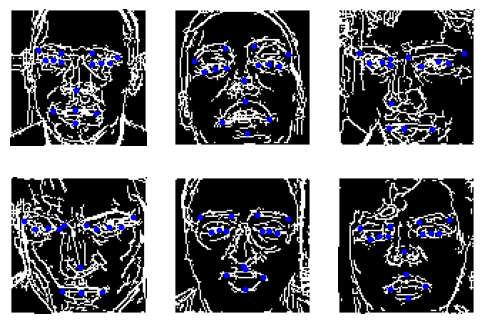

In [92]:
show_multiple_images_with_keypoints_in_tf_datasets(canny_facial_keypoints_train_dataset_loaded, 6, figsize_per_image=(2, 2), scatter_size=10, scatter_color='blue')

In [186]:
# def masked_mse_loss(y_true, y_pred):
#     mask = tf.not_equal(y_true, 0)
#     loss = tf.square(tf.boolean_mask(y_true - y_pred, mask))
#     return tf.reduce_mean(loss)

def masked_mse_loss(y_true, y_pred):
    # Create a mask based on the true labels
    mask = tf.where(tf.greater(y_true, 0), tf.ones_like(y_true), tf.zeros_like(y_true))
    # Compute the mean squared error
    mse = tf.square(y_true - y_pred)
    # Apply the mask to the mse
    masked_mse = mse * mask
    # Compute the mean of the masked mse
    return tf.reduce_mean(masked_mse)

def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.ReLU()(x)
    return x


def build_ml_resnet(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Initial Conv Layer
    x = tf.keras.layers.Conv2D(32, (11, 11), strides=1, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPooling2D((2, 2))(x)

    # Residual Blocks
    for _ in range(2):
        x = residual_block(x, 32)

    # Fully Connected Layer
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(30)(x)  # 15 keypoints (x, y) coordinates

    model = tf.keras.models.Model(inputs, outputs)
    return model

model = build_ml_resnet((96, 96, 1))
model.compile(optimizer='adam', loss=masked_mse_loss, metrics=['mae'], run_eagerly=True)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 conv2d_30 (Conv2D)          (None, 96, 96, 32)           3904      ['input_7[0][0]']             
                                                                                                  
 batch_normalization_30 (Ba  (None, 96, 96, 32)           128       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_30 (ReLU)             (None, 96, 96, 32)           0         ['batch_normalization_30

In [187]:
data_train, data_test = tf.keras.utils.split_dataset(
    face_images_tf_dataset_fixed_loaded_sobel, 
    right_size=0.2, 
    shuffle=True, 
    seed=42
)

In [188]:
data_train.cardinality(), data_test.cardinality()

(<tf.Tensor: shape=(), dtype=int64, numpy=11278>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2820>)

In [190]:
data_train_repeated = data_train.batch(64).repeat()
data_test_repeated = data_test.batch(64).repeat()

In [191]:
train_steps = 11278 // 64
valid_steps = 2820 // 64

# Assuming `train_images` and `train_keypoints` are your training data and labels
model.fit(
    data_train_repeated,
    steps_per_epoch=train_steps,
    validation_data=data_test_repeated, 
    validation_steps=valid_steps,
    epochs=5, 
)

Epoch 1/5
176/176 [==============================] - 215s 1s/step - loss: 652.2166 - mae: 30.3732 - val_loss: 247.5492 - val_mae: 24.1231
Epoch 2/5
176/176 [==============================] - 228s 1s/step - loss: 261.1637 - mae: 28.9620 - val_loss: 109.6081 - val_mae: 25.0927
Epoch 3/5
176/176 [==============================] - 227s 1s/step - loss: 245.1749 - mae: 28.6649 - val_loss: 82.3343 - val_mae: 25.9076
Epoch 4/5
176/176 [==============================] - 227s 1s/step - loss: 236.7566 - mae: 28.7163 - val_loss: 126.8526 - val_mae: 24.8545
Epoch 5/5
176/176 [==============================] - 226s 1s/step - loss: 239.1377 - mae: 28.5912 - val_loss: 107.6256 - val_mae: 25.0890


In [47]:
# import re

# # List of column names
# facial_key_points_columns=samples_test.drop(columns='Image').columns

# # Function to reverse the suffixes using regex
# def reverse_suffix(column_name):
#     return re.sub(r'(x|y)$', lambda match: 'y' if match.group(1).lower() == 'x' else 'x', column_name, flags=re.IGNORECASE | re.MULTILINE)

# # Apply the function to each column name
# facial_key_points_columns_reversed = [reverse_suffix(column) for column in facial_key_points_columns]

# # Print the result
# print(f'original: {facial_key_points_columns}')
# print(f'reversed: {facial_key_points_columns_reversed}')

# rename_columns = result = {key: value for key, value in zip(facial_key_points_columns, facial_key_points_columns_reversed)}
# samples_test_revesed.rename(columns=rename_columns, inplace=True)

#### langkah Uji Coba sebelum di ubah menjadi tensorflow datasets:
1. ambil 2 sampel untuk dijadikan percobaan, lalu buat copy dari 2 sampel tersebut gambar beserta facial-keypointnya.
2. setelah di copy maka akan ada 4 gambar dengan 2 gambar dan facial-keypoitnya yang sama.
3. 2 hasil gambar yang di copy lalu di flip secara horizontal untuk di augmentasi.
4. namun untuk facial key-pointya masih belum tercopy, sehingga koordinatnya masih salah.
5. maka perlu di atur dengan menukar sumbu x menjadi y dan y menjadi x.

#### langkah jika berhasil:
1. jika berhasil maka, terapkan untuk seluruh gambar dan facial keypointsnya, dengan kondisi facial keypoinnya suda terflip.
2. sehingga total data menjadi 2 kali lipat dari data asli, namun kondisi gambar pada data copy masih belum terflip.
3. setelah diubah menjadi tensorflow datasets maka gambar pada data copy di flip, dengan melakukan slicing index pada data copy. untuk diterapkannya flip horizontal.
4. jika gagal, maka cari cara lain.

#### validasi hasil preprocessing:
1. menampilkan gambar copy yang sudah terflip beserta facial keypointnya dengan data asli, untuk mengetahui langkah telah sukses.
